### Imports

In [305]:
import cv2 # Biblio de traitement d'image openCV 
import os # biblio os permet de faire les traitements des fichiers
from sklearn.preprocessing import StandardScaler # StandardScaler permet de faire la normalisation des données  
import numpy as np # biblio de traitement matricielle numpy
from sklearn.model_selection import train_test_split # permet de diviser la base de données en base test + base apprentissage
from sklearn.metrics import plot_confusion_matrix #permet de calculer et afficher la matrice de confision  
import matplotlib.pyplot as plt # permet de faire l'affichage dans l'environement
from imutils import paths # permet de faire le traitement sur les paths (les liens)
import random  # biblio de calcul aléatoire
from sklearn.svm import SVC # classifieur SVM

### Paths

In [306]:
path_dataset = 'dataset' # le path du dossier contient la base données 

### Fonction de l'éxtraction des caractéristiques des images de la base de données

In [307]:

# la fonction qui permet de faire l'extraction des caractéristiques 
# return vecteur des caractéristiques
def feature_extraction(image, hu_features=False, spatial_features=False, display=False):
    feature_vector = np.array([])
    if hu_features == True: # si oui === extraction des caractéristiques de hu moments 
        _,image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY) # binarisation de l'image (rendre l'image binaire)
        moments = cv2.moments(image) # calcul les moments de d'image 
        hu_moments = cv2.HuMoments(moments).reshape(-1) # calcul des hu moments 
        feature_vector  = np.hstack((feature_vector, hu_moments)) 
        if display == True: # si True === affichage de l'image binaire + vecteurs des hu moments 
            plt.imshow(image, cmap='gray')
            print('Le vecteur des hu moments: ', hu_moments)
            print()
    if spatial_features == True:  # si oui === extraction des caractéristiques spaciales 
        spatial_image = cv2.resize(image, (16,16), interpolation=cv2.INTER_AREA) # resize 
        spatial_vector = spatial_image.ravel() #  ravel() permet de convetir l'image en un seule array
        feature_vector = np.hstack((feature_vector, spatial_vector))
    return feature_vector

### Lire les image de la base de données et faire l'extraction des caractéristiques 

In [308]:
# extraire liste des  paths des images de la base de données + les mélanger (shuffle)  
imagePaths = sorted(list(paths.list_images(path_dataset)))
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []
# loop over the input images
print('Lire les images + extraction des caractéristiques ...')
for i, imagePath in enumerate(imagePaths):
    image = cv2.imread(imagePath, 0) # lire l'image en niveau de gris 
    # extraction des caractéristiques de hu moments + spaciales en un seule vecteur
    feature_vector = feature_extraction(image, hu_features=True, spatial_features=True) 
    data.append(feature_vector) # emplier le vecteur 
    label = imagePath.split(os.path.sep)[-2] # extraire labels  de l'image (ex: lambergini, ...) 
    labels.append(label)  #emplier la classe dans la listes des labels 

# Affichage des classes 
unique_labels = np.array(list(set(labels))) 
print('Les classes sont :', unique_labels)

Lire les images + extraction des caractéristiques ...
Les classes sont : ['Lamborghini Aventador Coupe 2012' 'BMW Z4 2019' 'Jeep Wrangler SUV 2012']


### Normalisation des données + Apprentissage avec SVM 

In [309]:

    
data = np.array(data)
labels = np.array(labels)

print('Normalisation des données ...')
scaler = StandardScaler().fit(data)
data = scaler.fit_transform(data) # normalisation des données 


# Divier la base de données en base d'apprentissage et base de test
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=6, stratify=labels)

# Définir le classifieur SVM avec C = 10,  gamma= 0.01 et le noyau RBF 
svm = SVC(C=10, gamma=0.01, kernel= 'rbf')
svm.fit(trainX, trainY) # Apprentissage du moodèle SVM 
print('Accuracy=', svm.score(testX, testY)*100, '%') # Calcul de l'accuracy sur la base de test

Normalisation des données ...
Accuracy= 70.0 %


### Affichage de matrice de confision

Matrice de confision ... 


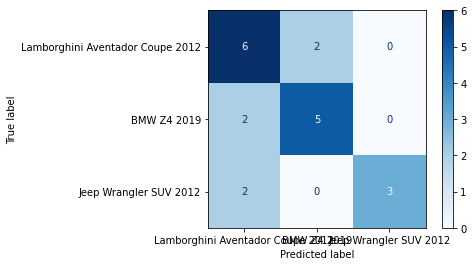

In [310]:
# Affichage de matrice de confision 
print('Matrice de confision ... ')
disp = plot_confusion_matrix(svm, testX, testY,
                      display_labels=  unique_labels,
                      cmap=plt.cm.Blues,
                      normalize=None)

### Exemple de prédiction

Le vecteur des hu moments:  [ 1.41650467e-03  6.98476924e-07  2.75016530e-10  1.49696298e-10
  1.34298097e-20 -4.94089703e-14  2.72432487e-20]

Cette voiture est:  Lamborghini Aventador Coupe 2012


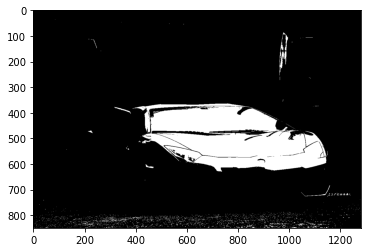

In [312]:
test_image = cv2.imread("examples\vert.jpg", 0) # lire une image par exmple lamborgini 
# extraction du vecteur de caarctéstques
feature_vector = feature_extraction(image, hu_features=True, spatial_features=True, display=True) 
feature_vector = feature_vector.reshape(1,-1) 
feature_vector = scaler.transform(feature_vector) # normalisation du vecteur de caractéristiques 
type_ = svm.predict(feature_vector)[0] # prédiction du marque et modèle de voiture  
print('Cette voiture est: ', type_) 